In [ ]:
import lux
lux.config.lazy_maintain = True
lux.config.early_pruning = True
lux.config.streaming = True

This notebook is originally derived from [this notebook on Kaggle](https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb).

In [1]:
# {{NO LUX}}
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd

In [2]:
numPoints=100

In [76]:
# {{NO LUX}}
airbnb=pd.read_csv("../../data/airbnb_250x.csv")
# airbnb=pd.read_csv("../../data/airbnb_nyc.csv")
airbnb = airbnb.sample(n=int(numPoints))

In [40]:
# {{NO LUX}}
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [41]:
# {{PRINT SERIES}}
airbnb.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                       21
reviews_per_month                 21
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [42]:
# {{NO LUX}}
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [43]:
# {{PRINT DF}}
airbnb

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5583675,Room with a View,3401676,Manhattan,Kips Bay,40.73774,-73.97343,Private room,95,28,1,0.03,1,72
8874428,"Cute, sunny room in NYC!",59111337,Manhattan,Washington Heights,40.85029,-73.93602,Private room,42,2,3,0.13,1,0
8302246,Sunny apartment in the heart of Williamsburg,4765019,Brooklyn,Williamsburg,40.71980,-73.95741,Entire home/apt,150,3,9,1.44,1,0
11411620,The Brass Shack,33346283,Manhattan,Harlem,40.83185,-73.94806,Private room,40,5,19,0.57,3,316
4777763,Brooklyn Private Apartment,209147067,Brooklyn,Borough Park,40.64480,-73.99524,Entire home/apt,120,2,5,0.52,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114555,"Cozy, private room in Bed-Stuy Apt!",17246368,Brooklyn,Bedford-Stuyvesant,40.68480,-73.94939,Private room,45,2,43,0.82,1,302
5619472,Central Park West private room and bathroom,51420334,Manhattan,Upper West Side,40.78747,-73.96844,Private room,59,1,0,NaN,1,0
10741684,Sunny Private Bedroom Near Manhattan,200600695,Queens,Sunnyside,40.74122,-73.92223,Private room,80,1,11,0.93,1,346
259104,King 7,42619297,Brooklyn,Fort Greene,40.69413,-73.97230,Entire home/apt,999,2,94,2.85,2,361


In [44]:
# {{PRINT DF}}
airbnb.fillna({'reviews_per_month':0}, inplace=True)
airbnb.reviews_per_month.isnull().sum()

0

In [45]:
# {{PRINT DF}}
airbnb

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5583675,Room with a View,3401676,Manhattan,Kips Bay,40.73774,-73.97343,Private room,95,28,1,0.03,1,72
8874428,"Cute, sunny room in NYC!",59111337,Manhattan,Washington Heights,40.85029,-73.93602,Private room,42,2,3,0.13,1,0
8302246,Sunny apartment in the heart of Williamsburg,4765019,Brooklyn,Williamsburg,40.71980,-73.95741,Entire home/apt,150,3,9,1.44,1,0
11411620,The Brass Shack,33346283,Manhattan,Harlem,40.83185,-73.94806,Private room,40,5,19,0.57,3,316
4777763,Brooklyn Private Apartment,209147067,Brooklyn,Borough Park,40.64480,-73.99524,Entire home/apt,120,2,5,0.52,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114555,"Cozy, private room in Bed-Stuy Apt!",17246368,Brooklyn,Bedford-Stuyvesant,40.68480,-73.94939,Private room,45,2,43,0.82,1,302
5619472,Central Park West private room and bathroom,51420334,Manhattan,Upper West Side,40.78747,-73.96844,Private room,59,1,0,0.00,1,0
10741684,Sunny Private Bedroom Near Manhattan,200600695,Queens,Sunnyside,40.74122,-73.92223,Private room,80,1,11,0.93,1,346
259104,King 7,42619297,Brooklyn,Fort Greene,40.69413,-73.97230,Entire home/apt,999,2,94,2.85,2,361


In [46]:
# {{NO LUX}}
airbnb.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [47]:
# {{PRINT DF}}
airbnb

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5583675,Room with a View,3401676,Manhattan,Kips Bay,40.73774,-73.97343,Private room,95,28,1,0.03,1,72
8874428,"Cute, sunny room in NYC!",59111337,Manhattan,Washington Heights,40.85029,-73.93602,Private room,42,2,3,0.13,1,0
8302246,Sunny apartment in the heart of Williamsburg,4765019,Brooklyn,Williamsburg,40.71980,-73.95741,Entire home/apt,150,3,9,1.44,1,0
11411620,The Brass Shack,33346283,Manhattan,Harlem,40.83185,-73.94806,Private room,40,5,19,0.57,3,316
4777763,Brooklyn Private Apartment,209147067,Brooklyn,Borough Park,40.64480,-73.99524,Entire home/apt,120,2,5,0.52,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114555,"Cozy, private room in Bed-Stuy Apt!",17246368,Brooklyn,Bedford-Stuyvesant,40.68480,-73.94939,Private room,45,2,43,0.82,1,302
5619472,Central Park West private room and bathroom,51420334,Manhattan,Upper West Side,40.78747,-73.96844,Private room,59,1,0,0.00,1,0
10741684,Sunny Private Bedroom Near Manhattan,200600695,Queens,Sunnyside,40.74122,-73.92223,Private room,80,1,11,0.93,1,346
259104,King 7,42619297,Brooklyn,Fort Greene,40.69413,-73.97230,Entire home/apt,999,2,94,2.85,2,361


In [48]:
# {{NO LUX}}
len(airbnb.neighbourhood.unique())

47

In [49]:
# {{NO LUX}}
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt'], dtype=object)

In [50]:
# {{NO LUX}}
top_host=airbnb.host_id.value_counts()

In [51]:
# {{PRINT SERIES}}
top_host

107434423    3
7805184      1
3401676      1
3086048      1
149409298    1
            ..
50388251     1
219517861    1
70682660     1
2879920      1
1865527      1
Name: host_id, Length: 98, dtype: int64

In [52]:
# {{NO LUX}}
top_host_check=airbnb.calculated_host_listings_count.max()

In [53]:
# {{PRINT SERIES}}
top_host_check

327

In [54]:
# {{NO LUX}}
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)

In [55]:
# {{PRINT DF}}
top_host_df

,Host_ID,P_Count
0,107434423,3
1,7805184,1
2,3401676,1
3,3086048,1
4,149409298,1
...,...,...
93,50388251,1
94,219517861,1
95,70682660,1
96,2879920,1


In [56]:
# {{NO LUX}}
sub_1=airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
sub_2=airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
sub_3=airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
sub_4=airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
sub_5=airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [57]:
# {{PRINT DF}}
sub_1

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
8302246,Sunny apartment in the heart of Williamsburg,4765019,Brooklyn,Williamsburg,40.71980,-73.95741,Entire home/apt,150,3,9,1.44,1,0
4777763,Brooklyn Private Apartment,209147067,Brooklyn,Borough Park,40.64480,-73.99524,Entire home/apt,120,2,5,0.52,1,3
11297934,Beautiful and spacious bedroom in Williamsburg,7849107,Brooklyn,Williamsburg,40.71351,-73.94316,Private room,70,6,1,0.04,2,0
4400614,Double Room w Private Deck Clinton Hill Best Area,63613,Brooklyn,Clinton Hill,40.69000,-73.96788,Private room,55,7,27,0.23,2,292
1968176,private bedroom and private bath,49431548,Brooklyn,Prospect-Lefferts Gardens,40.65862,-73.95777,Private room,78,1,1,0.02,1,0
1143993,Cozy Apartment off J&M Subway Lines,19977987,Brooklyn,Bushwick,40.70051,-73.93909,Entire home/apt,125,1,12,0.38,1,0
868806,Comfortable and Modern BedStuy Hideaway,25970711,Brooklyn,Bedford-Stuyvesant,40.68457,-73.92914,Entire home/apt,100,2,8,1.09,1,75
12085494,1 bedroom apt in pvt 2 fam house,33825321,Brooklyn,Crown Heights,40.67255,-73.93328,Entire home/apt,150,1,24,0.51,1,299
12013157,Private Room in Luxury BK Apartment,156958091,Brooklyn,Bushwick,40.69319,-73.90692,Private room,40,1,35,2.92,3,0
1012936,Private room in trendy Williamsburg,20448671,Brooklyn,Williamsburg,40.70980,-73.94180,Private room,66,2,6,0.66,3,173


In [58]:
# {{PRINT DF}}
sub_5

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1334595,living affordably in prim RIVERDALE,24789838,Bronx,Kingsbridge,40.88599,-73.89868,Private room,45,6,0,0.0,2,0


In [59]:
# {{PRINT SERIES}}
price_sub5

,price
1334595,45


In [60]:
# {{PRINT DF}}
airbnb

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5583675,Room with a View,3401676,Manhattan,Kips Bay,40.73774,-73.97343,Private room,95,28,1,0.03,1,72
8874428,"Cute, sunny room in NYC!",59111337,Manhattan,Washington Heights,40.85029,-73.93602,Private room,42,2,3,0.13,1,0
8302246,Sunny apartment in the heart of Williamsburg,4765019,Brooklyn,Williamsburg,40.71980,-73.95741,Entire home/apt,150,3,9,1.44,1,0
11411620,The Brass Shack,33346283,Manhattan,Harlem,40.83185,-73.94806,Private room,40,5,19,0.57,3,316
4777763,Brooklyn Private Apartment,209147067,Brooklyn,Borough Park,40.64480,-73.99524,Entire home/apt,120,2,5,0.52,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114555,"Cozy, private room in Bed-Stuy Apt!",17246368,Brooklyn,Bedford-Stuyvesant,40.68480,-73.94939,Private room,45,2,43,0.82,1,302
5619472,Central Park West private room and bathroom,51420334,Manhattan,Upper West Side,40.78747,-73.96844,Private room,59,1,0,0.00,1,0
10741684,Sunny Private Bedroom Near Manhattan,200600695,Queens,Sunnyside,40.74122,-73.92223,Private room,80,1,11,0.93,1,346
259104,King 7,42619297,Brooklyn,Fort Greene,40.69413,-73.97230,Entire home/apt,999,2,94,2.85,2,361


In [61]:
# {{NO LUX}}
p_l_b_n_2=[]
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)

In [62]:
# {{NO LUX}}
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])

In [63]:
# {{PRINT DF}}
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,30.0,39.0,10.00,75.0,45.0
25%,62.0,85.0,49.75,75.0,45.0
50%,95.0,135.0,66.50,75.0,45.0
75%,159.0,215.0,117.50,75.0,45.0
max,999.0,500.0,398.00,75.0,45.0


In [64]:
# {{PRINT DF}}
airbnb

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5583675,Room with a View,3401676,Manhattan,Kips Bay,40.73774,-73.97343,Private room,95,28,1,0.03,1,72
8874428,"Cute, sunny room in NYC!",59111337,Manhattan,Washington Heights,40.85029,-73.93602,Private room,42,2,3,0.13,1,0
8302246,Sunny apartment in the heart of Williamsburg,4765019,Brooklyn,Williamsburg,40.71980,-73.95741,Entire home/apt,150,3,9,1.44,1,0
11411620,The Brass Shack,33346283,Manhattan,Harlem,40.83185,-73.94806,Private room,40,5,19,0.57,3,316
4777763,Brooklyn Private Apartment,209147067,Brooklyn,Borough Park,40.64480,-73.99524,Entire home/apt,120,2,5,0.52,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114555,"Cozy, private room in Bed-Stuy Apt!",17246368,Brooklyn,Bedford-Stuyvesant,40.68480,-73.94939,Private room,45,2,43,0.82,1,302
5619472,Central Park West private room and bathroom,51420334,Manhattan,Upper West Side,40.78747,-73.96844,Private room,59,1,0,0.00,1,0
10741684,Sunny Private Bedroom Near Manhattan,200600695,Queens,Sunnyside,40.74122,-73.92223,Private room,80,1,11,0.93,1,346
259104,King 7,42619297,Brooklyn,Fort Greene,40.69413,-73.97230,Entire home/apt,999,2,94,2.85,2,361


In [65]:
# {{PRINT SERIES}}
airbnb.price

5583675      95
8874428      42
8302246     150
11411620     40
4777763     120
           ... 
4114555      45
5619472      59
10741684     80
259104      999
10943590     50
Name: price, Length: 100, dtype: int64

In [66]:
# {{NO LUX}}
sub_6=airbnb[airbnb.price < 500]

In [67]:
# {{PRINT DF}}
sub_6

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5583675,Room with a View,3401676,Manhattan,Kips Bay,40.73774,-73.97343,Private room,95,28,1,0.03,1,72
8874428,"Cute, sunny room in NYC!",59111337,Manhattan,Washington Heights,40.85029,-73.93602,Private room,42,2,3,0.13,1,0
8302246,Sunny apartment in the heart of Williamsburg,4765019,Brooklyn,Williamsburg,40.71980,-73.95741,Entire home/apt,150,3,9,1.44,1,0
11411620,The Brass Shack,33346283,Manhattan,Harlem,40.83185,-73.94806,Private room,40,5,19,0.57,3,316
4777763,Brooklyn Private Apartment,209147067,Brooklyn,Borough Park,40.64480,-73.99524,Entire home/apt,120,2,5,0.52,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11242871,Amazing 6bd/2ba Duplex w/ Patio 5 mins to NYC,219908197,Brooklyn,Williamsburg,40.71779,-73.94232,Entire home/apt,495,2,1,1.00,3,341
4114555,"Cozy, private room in Bed-Stuy Apt!",17246368,Brooklyn,Bedford-Stuyvesant,40.68480,-73.94939,Private room,45,2,43,0.82,1,302
5619472,Central Park West private room and bathroom,51420334,Manhattan,Upper West Side,40.78747,-73.96844,Private room,59,1,0,0.00,1,0
10741684,Sunny Private Bedroom Near Manhattan,200600695,Queens,Sunnyside,40.74122,-73.92223,Private room,80,1,11,0.93,1,346


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

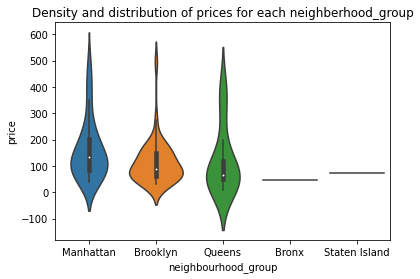

In [68]:
# {{PRINT SERIES}}
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

In [69]:
# {{PRINT DF}}
airbnb

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5583675,Room with a View,3401676,Manhattan,Kips Bay,40.73774,-73.97343,Private room,95,28,1,0.03,1,72
8874428,"Cute, sunny room in NYC!",59111337,Manhattan,Washington Heights,40.85029,-73.93602,Private room,42,2,3,0.13,1,0
8302246,Sunny apartment in the heart of Williamsburg,4765019,Brooklyn,Williamsburg,40.71980,-73.95741,Entire home/apt,150,3,9,1.44,1,0
11411620,The Brass Shack,33346283,Manhattan,Harlem,40.83185,-73.94806,Private room,40,5,19,0.57,3,316
4777763,Brooklyn Private Apartment,209147067,Brooklyn,Borough Park,40.64480,-73.99524,Entire home/apt,120,2,5,0.52,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114555,"Cozy, private room in Bed-Stuy Apt!",17246368,Brooklyn,Bedford-Stuyvesant,40.68480,-73.94939,Private room,45,2,43,0.82,1,302
5619472,Central Park West private room and bathroom,51420334,Manhattan,Upper West Side,40.78747,-73.96844,Private room,59,1,0,0.00,1,0
10741684,Sunny Private Bedroom Near Manhattan,200600695,Queens,Sunnyside,40.74122,-73.92223,Private room,80,1,11,0.93,1,346
259104,King 7,42619297,Brooklyn,Fort Greene,40.69413,-73.97230,Entire home/apt,999,2,94,2.85,2,361


In [70]:
# {{PRINT SERIES}}
airbnb.neighbourhood.value_counts()

Bedford-Stuyvesant           10
Williamsburg                  9
Bushwick                      7
Upper West Side               5
Upper East Side               4
Hell's Kitchen                4
Harlem                        4
Chelsea                       3
Sunset Park                   3
Prospect-Lefferts Gardens     2
Jamaica                       2
East Harlem                   2
Crown Heights                 2
Lower East Side               2
Midtown                       2
SoHo                          2
Greenpoint                    2
Borough Park                  2
Fort Greene                   2
Washington Heights            2
East Village                  2
Astoria                       2
Flatbush                      1
Carroll Gardens               1
Flushing                      1
Ditmars Steinway              1
Gowanus                       1
Jackson Heights               1
Woodside                      1
Concord                       1
Little Italy                  1
Long Isl

In [71]:
# {{NO LUX}}
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

In [72]:
# {{PRINT DF}}
sub_7

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
8302246,Sunny apartment in the heart of Williamsburg,4765019,Brooklyn,Williamsburg,40.71980,-73.95741,Entire home/apt,150,3,9,1.44,1,0
11411620,The Brass Shack,33346283,Manhattan,Harlem,40.83185,-73.94806,Private room,40,5,19,0.57,3,316
11297934,Beautiful and spacious bedroom in Williamsburg,7849107,Brooklyn,Williamsburg,40.71351,-73.94316,Private room,70,6,1,0.04,2,0
726419,94TH STREET BIGGER 1BR SUITE WITH DOORMAN-GYM,123745971,Manhattan,Upper East Side,40.78187,-73.94699,Private room,500,2,0,0.00,6,351
1143993,Cozy Apartment off J&M Subway Lines,19977987,Brooklyn,Bushwick,40.70051,-73.93909,Entire home/apt,125,1,12,0.38,1,0
8418995,Private room. Amazing location!,35968845,Manhattan,Upper West Side,40.79421,-73.97097,Private room,89,3,1,0.02,2,0
868806,Comfortable and Modern BedStuy Hideaway,25970711,Brooklyn,Bedford-Stuyvesant,40.68457,-73.92914,Entire home/apt,100,2,8,1.09,1,75
5458233,Comfortable and close to everything!,179789963,Manhattan,Midtown,40.74564,-73.98181,Entire home/apt,115,3,3,0.20,1,0
12085494,1 bedroom apt in pvt 2 fam house,33825321,Brooklyn,Crown Heights,40.67255,-73.93328,Entire home/apt,150,1,24,0.51,1,299
12013157,Private Room in Luxury BK Apartment,156958091,Brooklyn,Bushwick,40.69319,-73.90692,Private room,40,1,35,2.92,3,0


In [73]:
# {{NO LUX}}
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')

In [74]:
# {{PRINT DF}}
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
7242441,Child-friendly 2BR w/ Yard access and Free Par...,510577,Brooklyn,Bedford-Stuyvesant,40.68578,-73.93965,Entire home/apt,170,3,207,3.76,1,151
442192,Great Studio in the heart of Harlem,4548229,Manhattan,Harlem,40.80421,-73.94302,Entire home/apt,135,30,190,2.63,4,253
2256068,Luxury in Best Location,25404246,Manhattan,Nolita,40.72139,-73.99688,Entire home/apt,346,198,163,2.96,1,0
3086963,Roomy/sunny/quiet/fun/great locale,24561040,Brooklyn,Park Slope,40.67851,-73.97678,Private room,95,2,132,2.70,3,265
1817917,Next to Empire State building,7209,Manhattan,Midtown,40.74642,-73.98516,Entire home/apt,220,3,108,2.17,1,24
6179310,Cozy private room and bathroom in Brooklyn,90765758,Brooklyn,Sunset Park,40.64293,-74.01786,Private room,58,3,106,3.06,1,3
259104,King 7,42619297,Brooklyn,Fort Greene,40.69413,-73.97230,Entire home/apt,999,2,94,2.85,2,361
11223075,Midtown Apt. with a great view and everything ...,149409298,Manhattan,Hell's Kitchen,40.76697,-73.99134,Private room,130,1,74,3.32,1,157
3838142,30+Day Stay: New 3-4 Bedroom 4 Bath Apt by a Deck,137522531,Queens,Flushing,40.75572,-73.80791,Entire home/apt,398,5,48,2.11,7,139
1958541,"Great Chelsea Location, Couch/2nd bed, Free WiFi",7245581,Manhattan,Chelsea,40.75028,-73.99533,Entire home/apt,96,115,45,0.63,19,210


In [75]:
# {{NO LUX}}
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 264.7
